# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Содержание

1. [Изучение данных из файла](#1id)

2. [Предобработка данных](#2id)
3. [Расчёты и добавление результатов в таблицу](#3id)
    * [Цена за квадратный метр ](#3.1id)
    * [День недели, месяц и год публикации объявления](#3.2id)
    * [Определяем этаж квартиры](#3.3id)
    * [Cоотношение жилой и общей площади](#3.4id)
    * [Соотношение площади кухни к общей площади](#3.5id)
4. [Исследовательский анализ данных](#4id)
    * [Построение гистограм](#4.1id)
    * [Время продажи квартиры](#4.2id)
    * [Избавление от выбросов](#4.3id)
5. [Факторы влияющие на стоимость квартиры](#5id)
    * [Цена/площадь](#5.1id)
    * [Цена/число комнат](#5.2id)
    * [Цена/удаленность от центра города](#5.3id)
    * [Цена/этаж](#5.4id)
    * [Цена/дата размещения](#5.5id)
6. [Анализ среза с наибольшим количеством объявлений](#6id)
7. [Анализ квартир в Санкт-Петербурге](#7id)
8. [Анализ центральной части города](#8id)
9. [Факторы влиящие на стоимость квартир в центре ](#9id)

## 1. Изучение данных из файла <a id="1id"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from pymystem3 import Mystem
import numpy as np

In [2]:
try:
    df = pd.read_csv('/home/olga/Downloads/real_estate_data.csv')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv')
df.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [3]:
try:
    df = pd.read_csv('/home/olga/Downloads/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

В таблице 22 столбца и 23699 строк. Здесь мы встречаемся с вещественным, целочисленным, булевым и строковым типом данных. Во многих столбцах есть пропущенные значения. 
Изучим детально, есть ли в таблице некорректные значения, типы данных, а также возможно ли заменить пропущенные значения. Рассмотрим каждый столбец

## 2. Предобработка данных <a id="2id"></a>

In [5]:
df.isna().sum()  # сумма пропусков в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В датасете большое количество пропущенных значений. Посмотрим на каждый столбец

### Проверка "total_images" - число фотографий квартиры в объявлении

В столбце "total_images" нет пропущенных значений. Тип данных для количества фотографий выбран корректно - целочисленный. Искать дубликаты здесь не имеет смысла

### Проверка "last_price" - цена на момент снятия с публикации

In [6]:
df['last_price'].describe().round()

count        23699.0
mean       6541549.0
std       10887013.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6800000.0
max      763000000.0
Name: last_price, dtype: float64

Пропусков нет. Заменим тип данных на целочисленный

Кажется, здесь есть выбросы. Минимальная стоимость жилья в Ленинградской области начинается от 300 000 рублей: https://realty.yandex.ru/leningradskaya_oblast/kupit/kvartira/?utm_source=yandex_direct&utm_medium=direct_brand&utm_campaign=460_69067812_poisk_msk_brand&utm_content=11527276185&utm_term=%D1%8F%D0%BD%D0%B4%D0%B5%D0%BA%D1%81%20%D0%BD%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C_35515956151&yclid=16428472797709205503&sort=PRICE

Проверим сколько квартир в датасете стоят меньше 300 тыс рублей

In [7]:
df['last_price'] = df['last_price'].astype('int')

In [8]:
df.query('last_price < 300000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Есть одно аномальное значение. Сложно представить  стоимость квартиры в 12 тыс рублей даже в регионе. Чуть позже удалим

### Проверка "total_area" - площадь квартиры в квадратных метрах (м²) 

In [9]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Минимальный и максимальный показатели кажутся реалистичными. Пропусков нет. Для удобства заменим данные на целочисленный тип

In [10]:
df['total_area'] = df['total_area'].astype('int')

### Проверка "first_day_exposition" - дата публикации

In [11]:
df['first_day_exposition'].describe()

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

Есть смысл заменить строковый тип данных на datetime, чтобы иметь возможность вычислять дату, день недели или месяц публикации

In [12]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

### Проверка "rooms" - число комнат

In [13]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Есть нулевые значения. Возможно, эти строки попадают в тип "студия"

In [14]:
df.query('rooms > 15')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000,374,2018-06-09,19,NaN,5.0,264.5,2,NaN,...,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000,270,2015-03-02,16,3.0,4.0,180.0,4,NaN,...,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0


В столбце есть несколько значений с большим количеством комнат. В Яндекс.Невижимости можно найти квартиры с 15 комнатами. Поэтому оставим эти значения

### Проверка "ceiling_height" - высота потолков (м)

In [15]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Пропущенных значений нет. В колонке есть выбросы: 1 метр и 100 метров - далекие от стандартов и реальности данные. Возможно, не всегда продавцы считают важным указывать высоту потолка в отличие от других характеристик, так как в большинстве случаев она стандартная. Оставим пропуски, как есть

### Проверка "floors_total" - всего этажей в доме

In [16]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [17]:
df['floors_total'].isna().count()

23699

Количество этажей по имеющимся данным определить сложно. Оставим пропуски

### Проверка living_area - жилая площадь в квадратных метрах (м²)

In [18]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [19]:
df['living_area'].isna().sum()

1903

Чтобы заполнить пропуски в жилой площади, найдем отношение среднего значения по жилой площади к среднему по общей. Этот коэффициент умножим на общую площадь квартиры каждой строки и приведем к целочисленным значениям

In [20]:
aver_living_area = df['living_area'].mean()
aver_total_area = df['total_area'].mean()

In [21]:
df['living_area'] = df['living_area'].fillna((aver_living_area/aver_total_area)*df['total_area'])

In [22]:
df['living_area'].isna().sum()

0

In [23]:
df['living_area'] = df['living_area'].astype('int')

### Проверка "floor" - этаж

In [24]:
df['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [25]:
df['floor'].isna().sum()

0

In [26]:
df['floor'].value_counts().head(10)

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
Name: floor, dtype: int64

В Санкт-Петербурге больше всего домоd с этажами от 9 и меньше. 
Пропусков в столбце нет. Заменим показатели на целочисленные

In [27]:
df['floor'] = df['floor'].astype('int')

### Проверка "is_apartment" - апартаменты

In [28]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [29]:
df['is_apartment'].isna().sum()

20924

Сложно будет заполнить по имеющимся данным пустые значения. Оставим их, как есть.

В наборе данные всего 149 квартиры-студии. Остальные - обычные квартиры с планировкой, разделяющей разные зоны

### Проверка "open_plan" - свободная планировка 

In [30]:
df['open_plan'].isna().sum()

0

In [31]:
df['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

Всего 67 квартир со свободной планировкой. Пропусков нет. Тип данных корректный

### Проверка  "kitchen_area" - площадь кухни в квадратных метрах

In [32]:
df['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [33]:
df['kitchen_area'].isna().sum()

2278

Как и в living_area найдем коэффициент отношения средней площади кухни к средней общей площади. Заполним пропуски произведением коэффициента и общей площади

In [34]:
aver_kitchen_area = df['kitchen_area'].mean()
aver_total_area = df['total_area'].mean()

In [35]:
df['kitchen_area'] = df['kitchen_area'].fillna((aver_kitchen_area/aver_total_area)*df['kitchen_area'])

### Проверка "balcony" - число балконов

In [36]:
df['balcony'].isna().sum()

11519

Предположим, что если информации о налиии балкона не указана, то его просто нет в квартире. Заменим все пропуски на нули. Преобразуем показатели в целочисленный тип данных

In [37]:
df['balcony'] = df['balcony'].fillna(0)

In [38]:
df['balcony'] = df['balcony'].astype('int')

### Проверка  "locality_name" - название населённого пункта

В столбце немного пропущенных данных. Удалим их. Заменим буквы "ё" на "е"

In [39]:
df['locality_name'].isna().sum()

49

In [40]:
df['locality_name'].dropna()

0            Санкт-Петербург
1             посёлок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23650, dtype: object

In [41]:
df['locality_name'] = df['locality_name'].str.replace("ё", "е") 

### Проверка  столбцов "airports_nearest", "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest"

В указанных столбцах много пропусков. Возможно, в заданном интервале, действительно, нет ни парков, ни прудов, ни аэропортов. Пропуски заменять не будем. Эти данные не будут использованы в нашем исследовании. Есть смысл заменить типы данных в некоторых столбцах и округлить до удобных для восприятия цифр

In [42]:
# округляем вещественные числа до двух знаков после запятой, переводим вещественные значения в целочисленные 
df['airports_nearest'] = df['airports_nearest'].round(2)
df['parks_nearest'] = df['parks_nearest'].round(2)
df['parks_around3000'] = df['parks_around3000'].astype('Int32')
df['ponds_around3000'] = df['ponds_around3000'].astype('Int32')

### Проверка "cityCenters_nearest" - расстояние до центра города (м)

In [43]:
df['cityCenters_nearest'].isna().sum()

5519

Пропущенных значений много. На данном этапе не будем заполнять пропуски

### Проверка "days_exposition" - сколько дней было размещено объявление (от публикации до снятия)

In [44]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [45]:
df['days_exposition'].isna().sum()

3181

In [46]:
df['days_exposition'] = df['days_exposition'].round(0).astype('Int32')

Важный показатель, который пригодится нам для подсчета времени продажи квартир. Пропуски заполнять не будем. Переведем дни в целочисленные значения

### Вывод

Мы более детально рассмотрели показатели каждого столбца. Некоторые пропущенные значения удалось заменить. Также мы скорректировали типы значений в некоторый столбцах для проведения корректных рассчетов

## 3. Расчёты и добавление результатов в таблицу <a id="3id"></a>

Посчитаем и добавим несколько столбцов в таблицу

### 3.1 Цена за квадратный метр <a id="3.1id"></a>

In [47]:
df['price_per_meter'] = (df['last_price'] / df['total_area']).astype('int')
df['price_per_meter'].head()

0    120370
1     83750
2     92785
3    408176
4    100000
Name: price_per_meter, dtype: int64

### 3.2 День недели, месяц и год публикации объявления<a id="3.2id"></a>

In [48]:
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).dayofweek # день недели

In [49]:
df['weekday'].head() # понедельник=0, воскресенье=6

0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64

Создадим функцию, которая переберет получившиеся цифры-значения и перезапишет дни недели словами

In [50]:
def weekday_def(weekday):
    if weekday == 0:
        return 'понедельник'
    if weekday == 1:
        return 'вторник'
    if weekday == 2:
        return 'среда'
    if weekday == 3:
        return 'четверг'
    if weekday == 4:
        return 'пятница'
    if weekday == 5:
        return 'суббота'
    else:
        return 'воскресенье'

In [51]:
df['weekday'] = df['weekday'].apply(weekday_def)

In [52]:
df['weekday'].head()

0    четверг
1    вторник
2    четверг
3    пятница
4    вторник
Name: weekday, dtype: object

Столбец "месяц" заполним строковыми значениями с помощью словаря

In [53]:
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month # месяц от 1 до 12
df['month'].head()

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64

Создадим словать, ключи которого будут указывать на значения - названия месяцев и применим его к столбцу

In [54]:
month_dict = {
    1:'январь', 2:'февраль', 3:'март', 4:'апрель', 5:'май', 6:'июнь', 7:'июль', 8:'август', 9:'сентябрь', 10:'октябрь', 11:'ноябрь', 12:'декабрь'
             }

In [55]:
df['month'] = df['month'].map(month_dict)
df['month'].head()

0       март
1    декабрь
2     август
3       июль
4       июнь
Name: month, dtype: object

In [56]:
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year # год
df['year'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64

In [57]:
df.loc[:, 'weekday':'year'].head()

,weekday,month,year
0,четверг,март,2019
1,вторник,декабрь,2018
2,четверг,август,2015
3,пятница,июль,2015
4,вторник,июнь,2018


Создали и заполнили дополнительные столбцы: день недели и месяц строковыми значениями, год  - целочисленными

### 3.3 Определяем этаж квартиры<a id="3.3id"></a>

Создадим словарь с тремя категориями и функцию, которая будет определять номер этажа к определенной категории

In [58]:
floor_category=['первый', 'последний', 'другой']

In [59]:
def what_floor(df):
    if df['floor'] == 1:
        return 'первый'
    if df['floor'] == df['floors_total']:
        return 'последний'
    return 'другой'

In [60]:
df['floor_category'] = df.apply(what_floor, axis=1) # применим функцию к столбцу

In [61]:
df['floor_category'].head()

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_category, dtype: object

### 3.4 Cоотношение жилой и общей площади<a id="3.4id"></a>

Выведем процентное отношение жилоай площади к общей

In [62]:
df['living_area_ratio'] = (df['living_area'] / df['total_area']).round(1) # находим соотношение
df['living_area_ratio'].value_counts().sort_values(ascending=False) # выводим сортировку соотношения

0.6    9424
0.5    6311
0.7    3927
0.4    2902
0.8     538
0.3     443
0.9      82
0.2      52
1.0      13
0.1       5
0.0       2
Name: living_area_ratio, dtype: int64

Как видим, у большей части жилищного фонда Санкт-Петербурга жилая часть занимает как минимум половину от всей площади квартиры

### 3.5 Соотношение площади кухни к общей площади<a id="3.5id"></a>

In [63]:
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']
df['kitchen_area_ratio'].value_counts().sort_values(ascending=False).head(10)

0.200000    312
0.250000    246
0.166667    224
0.142857    175
0.133333    169
0.187500    168
0.125000    145
0.136364    142
0.193548    130
0.155556    124
Name: kitchen_area_ratio, dtype: int64

Кухня занимает до 20% от общей площади квартир

### Вывод

Мы посчитали и добавили в таблицу несколько показателей: цену квадратного метра; день недели, месяц и год публикации объявления. Категоризовали этажи в квартирах, а также посчитали соотношение кухни и жилой площади к общей площади квартир

## 4. Исследовательский анализ данных<a id="4id"></a>

### 4.1 Построение гистограм<a id="4.1id"></a>

Изучим следущие столбцы: площадь, цена, число комнат, высота потолков. Построим для каждого гистограммы

In [64]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].round().describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,14504.000000
mean,60.120511,6.541549e+06,2.070636,2.826048
std,35.665822,1.088701e+07,1.078405,1.319741
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,3.000000
50%,52.000000,4.650000e+06,2.000000,3.000000
75%,69.000000,6.800000e+06,3.000000,3.000000
max,900.000000,7.630000e+08,19.000000,100.000000


### Площадь

In [65]:
df['total_area'].describe()

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

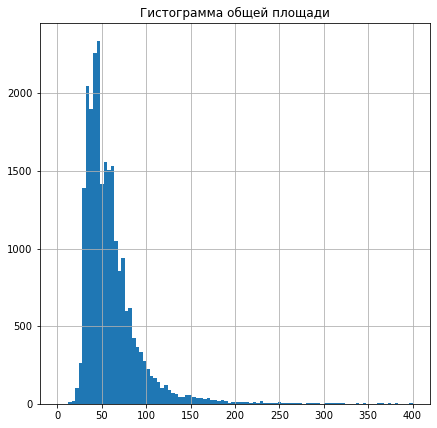

In [66]:
df['total_area'].hist(bins=100, figsize=(7,7), range=(0,400)).set_title('Гистограмма общей площади');

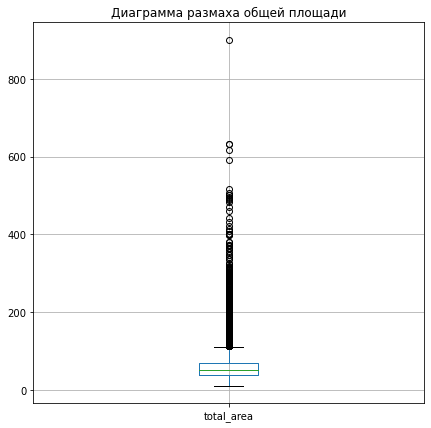

In [67]:
df.boxplot(column='total_area', figsize=(7,7)).set_title('Диаграмма размаха общей площади');

Большой пик приходится на площадь от 25 до 50 квадратных метров. Наблюдается тенденция: чем больше площадь, тем меньше реже такие квартиры встречаются, что кажется вполне логичным. Похоже на нормальное распределение. На диаграмме размаха можно наблюдать выбросы

### Цена

In [68]:
df['last_price'].describe().round()

count        23699.0
mean       6541549.0
std       10887013.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6800000.0
max      763000000.0
Name: last_price, dtype: float64

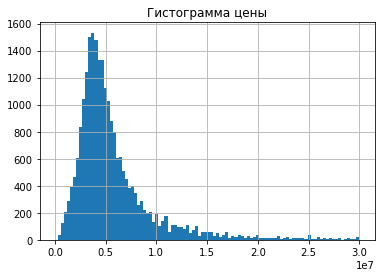

In [69]:
df['last_price'].hist(bins=100,range=(0,30000000)).set_title('Гистограмма цены');

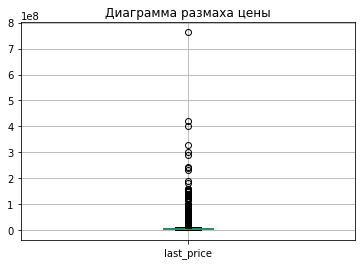

In [70]:
df.boxplot(column='last_price').set_title('Диаграмма размаха цены');

Чаще всего продаются квартиры за 3-4 млн рублей

### Число комнат

In [71]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

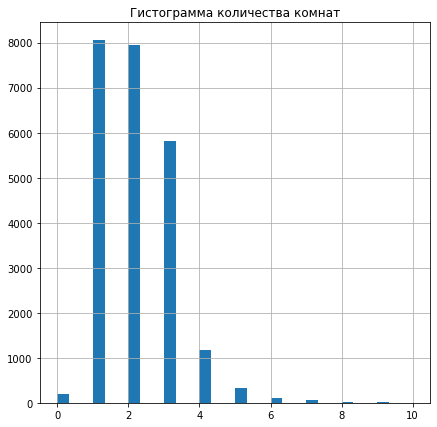

In [72]:
df['rooms'].hist(bins=30, figsize=(7,7), range=(0, 10)).set_title('Гистограмма количества комнат');

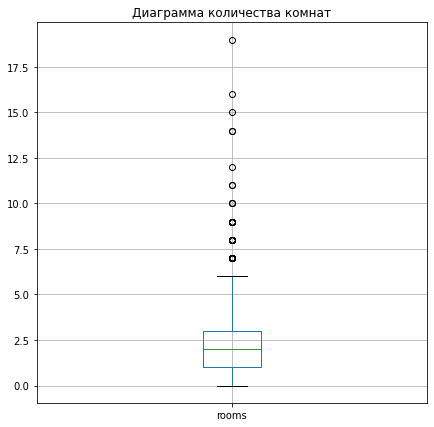

In [73]:
df.boxplot(column='rooms', figsize=(7,7)).set_title('Диаграмма количества комнат');

Чаще всего встречаются квартиры с 1, 2 и 3 комнатами. Видим также нулевые показатели (студии).

### Высота потолков

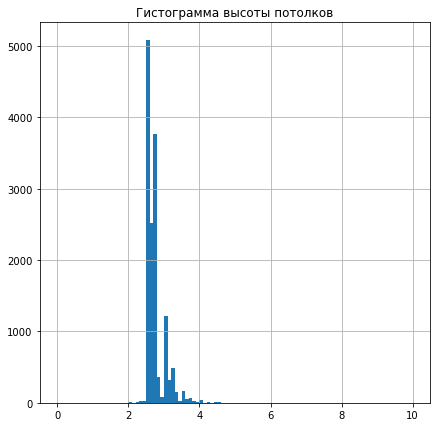

In [74]:
df['ceiling_height'].hist(bins=100, figsize=(7,7), range=(0, 10)).set_title('Гистограмма высоты потолков');

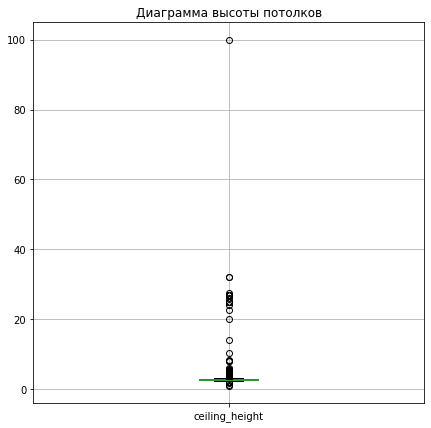

In [75]:
df.boxplot(column='ceiling_height', figsize=(7,7)).set_title('Диаграмма высоты потолков');

Большинство квартир имеет высоту полотка чуть больше 2,5 метров. Есть один выброс в 100 метров

### 4.2 Время продажи квартиры<a id="4.2id"></a>

In [76]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

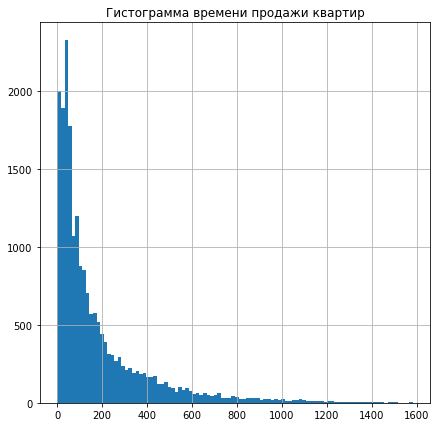

In [77]:
df['days_exposition'].hist(bins=100, figsize=(7,7)).set_title('Гистограмма времени продажи квартир');

Среднее количество дней, которое объявление висит на сайте - 180. Медианное значение - примерно 3 месяца (95 дней), что явялется вполне нормальным для крупной покупки. Несколько выбросов справа сильно сдвигают среднее значение (почти в два раза больше).
Самая быстрая продажа произошла за один день после публикации объявления, а самая долгая заняла больше 4 лет. Возможно, соотношение цены и других характеристик этой квартиры не соответствовало среднему рыночному показателю или объявление висело уже будучи неактуальным

На гистограмме мы также видим несколько пиков. Расмотрим поближе

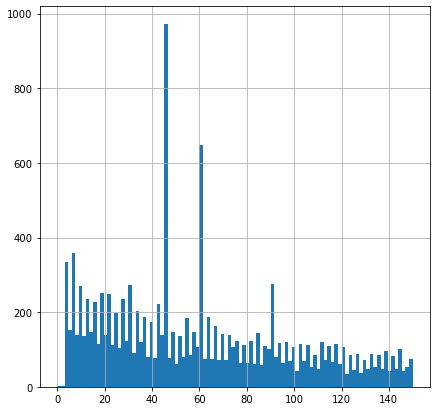

In [78]:
df['days_exposition'].hist(bins=100, figsize=(7,7), range=(0,150));

Эти пики приходятся на примерно 45, 60 и 90 дни. Согласно правилам, у Яндекс.Недвижимости есть определенные сроки публикации объявления согласно типу размещения: https://yandex.ru/support/realty/agency/home/add-ads-housing.html#publication-time
Сроки, в течение которых объявление о продаже считается актуальным: квартира - от 45 дней, комната - 30 и 45 дней (по мск и другим регионам), дом/участок - 60 и 90 дней (по мск и др регионам).
Вероятно, что те объявления, которые не были обновлены собственниками, как актуальные, автоматически удаляются по истечении определенного количества времени.

### Вывод 

Средняя квартира Санкт-Петербурга - это 2-x или 3-х комнатная квартира в диапазоне от 25 до 50 кв.метров с высотой потолков около 2,6 метров. В среднем квартиры продаются за 95 дней.


### 4.3 Избавление от выбросов <a id="4.3id"></a>

Уберем нереальные значения потолков (в старом фонде Санкт-Петербурга есть 4-4.5 метров), количество комнат ограничим максимальным числом 15, а общий объем квартиры  - 700 кв метров. Также сильно выбивающееся значение в цене (773 млн) тоже кажется выбросом. Ограничим от 300 тыс до 500 млн (на данный момент на Яндекс.Недвижимость нет квартир дешевле 300 тыс даже в регионе)

In [79]:
new_df = df.query('ceiling_height <= 5') # убираем нереальные значения высоты потолков
new_df['ceiling_height'].describe()

count    14468.000000
mean         2.725147
std          0.272571
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

In [80]:
new_df = new_df.query('rooms < 15')
new_df['rooms'].describe()

count    14466.000000
mean         2.135421
std          1.087074
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

In [81]:
new_df = new_df.query('total_area < 700')
new_df['total_area'].describe()

count    14465.000000
mean        61.491462
std         35.835407
min         12.000000
25%         41.000000
50%         53.000000
75%         71.000000
max        631.000000
Name: total_area, dtype: float64

In [82]:
# тут не получилось через query. Сделала через loc
new_df = new_df.loc[(new_df['last_price'] <= 500000000) & (new_df['last_price'] >= 300000)]

In [83]:
new_df['last_price'].sort_values(ascending=True).tail()

13749    240000000
16461    245000000
22831    289238400
15651    300000000
1436     330000000
Name: last_price, dtype: int64

In [84]:
new_df = new_df.loc[(new_df['days_exposition'] != 45) & (new_df['days_exposition'] != 30) \
 & (new_df['days_exposition'] != 60) & (new_df['days_exposition'] != 90) \
 & (new_df['days_exposition'] != 0)]
new_df['days_exposition'].describe()

count    11096.000000
mean       201.861482
std        234.141204
min          1.000000
25%         44.000000
50%        116.000000
75%        269.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [85]:
new_df = new_df.loc[(new_df['days_exposition'] < 990)]
new_df['days_exposition'].describe()

count    10901.000000
mean       184.565636
std        196.106854
min          1.000000
25%         43.000000
50%        114.000000
75%        255.000000
max        988.000000
Name: days_exposition, dtype: float64

## 5. Факторы влияющие на стоимость квартиры<a id="5id"></a>

Рассмотрим несколько показателей, чтобы проверить, какие из них влияют на цену квратиры: площадь, число комнат, удаленность от центра, этаж, дата размещения

In [86]:
new_df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,year,living_area_ratio,kitchen_area_ratio
count,10901.000000,1.090100e+04,10901.000000,10901.000000,10901.000000,10896.000000,10901.000000,10901.000000,10326.000000,10901.000000,...,8800.000000,8800.000000,3978.000000,8800.000000,4299.000000,10901.000000,1.090100e+04,10901.000000,10901.000000,10326.000000
mean,10.165581,6.466738e+06,59.781304,2.075314,2.717935,10.343153,34.353912,5.701128,10.383850,0.679571,...,14180.121136,0.628409,473.849170,0.761250,522.510351,184.565636,1.002849e+05,2017.348408,0.565902,0.186329
std,5.583759,9.345081e+06,34.408739,1.052789,0.265643,6.232588,21.936185,4.662541,5.713751,0.999805,...,8676.888973,0.815166,311.741339,0.944137,280.533581,196.106854,4.581578e+04,0.926706,0.105446,0.072138
min,0.000000,4.900000e+05,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,...,208.000000,0.000000,3.000000,0.000000,16.000000,1.000000,9.615000e+03,2014.000000,0.000000,0.025381
25%,6.000000,3.500000e+06,40.000000,1.000000,2.520000,5.000000,19.000000,2.000000,7.000000,0.000000,...,9456.500000,0.000000,285.000000,0.000000,294.500000,43.000000,7.847200e+04,2017.000000,0.500000,0.133333
50%,10.000000,4.700000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,13035.000000,0.000000,448.000000,0.000000,509.000000,114.000000,9.610300e+04,2017.000000,0.600000,0.172198
75%,14.000000,6.700000e+06,69.000000,3.000000,2.800000,14.000000,42.000000,8.000000,11.800000,1.000000,...,16072.250000,1.000000,603.000000,1.000000,734.000000,255.000000,1.149120e+05,2018.000000,0.600000,0.228571
max,50.000000,3.300000e+08,618.000000,14.000000,5.000000,60.000000,347.000000,27.000000,93.200000,5.000000,...,64857.000000,3.000000,3190.000000,3.000000,1344.000000,988.000000,1.736842e+06,2019.000000,1.000000,0.747500


### 5.1 Цена/площадь<a id="5.1id"></a>

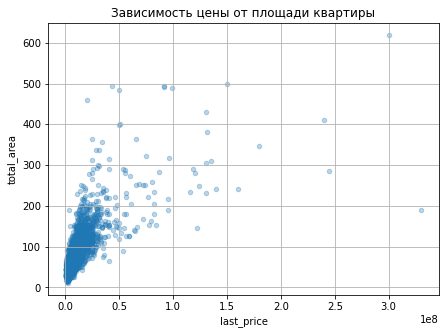

In [87]:
new_df.plot(x='last_price', y='total_area', kind='scatter', grid=True, alpha=0.3, figsize=(7,5), title='Зависимость цены от площади квартиры');

In [88]:
print('Коэффициент корреляции:', new_df['last_price'].corr(new_df['total_area']))

Коэффициент корреляции: 0.7055856756025671


По диаграмме рассеивания и коэффициенту корреляции можем утверждать, что связь между площадью и ценой есть: как правило, чем площадь квартиры больше, тем выше ее цена. 

### 5.2 Цена/число комнат<a id="5.2id"></a>

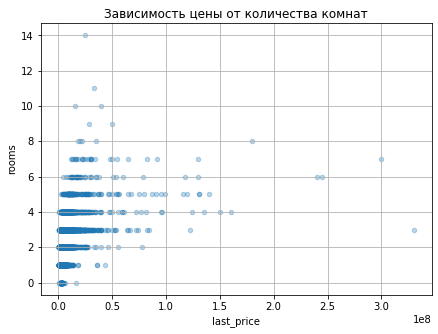

In [89]:
new_df.plot(x='last_price', y='rooms', kind='scatter', grid=True, alpha=0.3, figsize=(7,5), title='Зависимость цены от количества комнат');

In [90]:
print('Коэффициент корреляции:', new_df['last_price'].corr(df['rooms']))

Коэффициент корреляции: 0.3968327352107628


По диаграмме видно, что квартир, у котороых от 3 до 7 комнат, стоимость может быть выше, чем у остальных. Дальше этот показатель падает. Коэффициент корреляции также показывает не сильную связь между этими факторами. 

### 5.3 Цена/удаленность от центра города<a id="5.3id"></a>

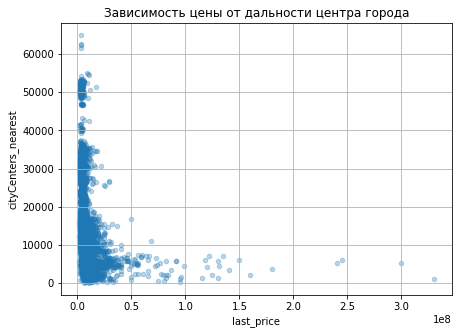

In [91]:
new_df.plot(x='last_price', y='cityCenters_nearest', kind='scatter', grid=True, alpha=0.3, figsize=(7,5), title='Зависимость цены от дальности центра города');

In [92]:
print('Коэффициент корреляции:', new_df['cityCenters_nearest'].corr(df['rooms']))

Коэффициент корреляции: -0.18872589744480633


Корреляция цен на квартиры от центра города отрицательная: чем меньше километров до центра, тем выше цена (квартиры в центре дороже квартир не в центре).

### 5.4 Цена/этаж<a id="5.4id"></a>

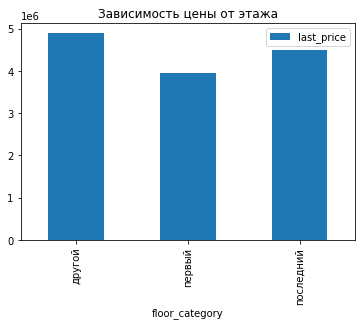

In [93]:
(new_df.pivot_table(index='floor_category',values='last_price',aggfunc='median')
       .plot(kind='bar')
       .set_title('Зависимость цены от этажа'));

In [94]:
print('Коэффициент корреляции:', df['last_price'].corr(df['floor']))

Коэффициент корреляции: 0.0265756432844708


Зависимость цены и этажа очень слабая. На диаграмме можем увидеть, что только первый этаж немного проседает в цене.

### 5.5 Цена/дата размещения<a id="5.5id"></a>

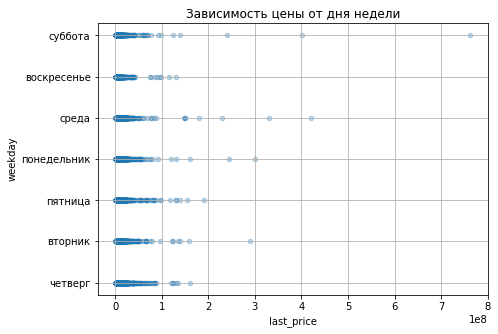

In [95]:
# зависимость цены от дня недели
df.plot(x='last_price', y='weekday', kind='scatter', grid=True, alpha=0.3, figsize=(7,5), title='Зависимость цены от дня недели');

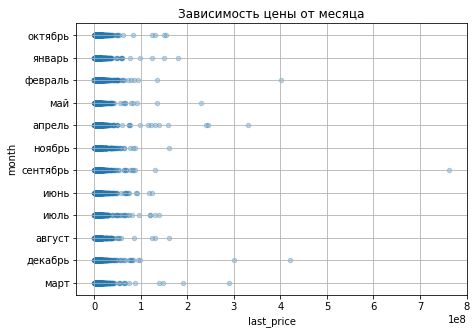

In [96]:
# зависимость цены от месяца
df.plot(x='last_price', y='month', kind='scatter', grid=True, alpha=0.3, figsize=(7,5), title='Зависимость цены от месяца');

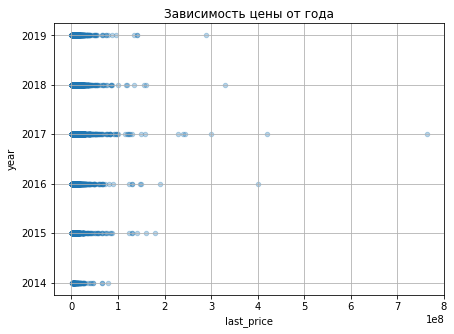

In [97]:
# зависимость цены от года
df.plot(x='last_price', y='year', kind='scatter', grid=True, alpha=0.3, figsize=(7,5), title='Зависимость цены от года');

In [98]:
print(df.pivot_table(index='year', values='last_price', aggfunc='median').round())

      last_price
year            
2014     7700000
2015     5350000
2016     4550000
2017     4500000
2018     4550000
2019     5050000


### Вывод

Проверив диаграммы по дням недели и месяцам зависимости цены от даты размещения, можно сказать, что если и есть корреляция, то она совсем небольшая. Данные по году немного отличаются. Здесь наблюдаются высокие цены в 2014 году. Судя из открытых источников, проект Я.Недвижимость запустился только в 2014 году. Вероятно, в начале было очень мало данных и сыграла случайность, что первыми пришли более дорогие квартиры.

## 6. Анализ среза с наибольшим количеством объявлений<a id="6id"></a>

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах

In [99]:
top_10=df.pivot_table(index='locality_name',values='price_per_meter',aggfunc=('count','median'))
top_10.sort_values(by='count',ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,15721,105263.0
поселок Мурино,556,86410.5
поселок Шушары,440,77222.5
Всеволожск,398,65811.0
Пушкин,369,100000.0
Колпино,338,74861.0
поселок Парголово,327,92222.0
Гатчина,307,67924.0
деревня Кудрово,299,92647.0


### Вывод

Мы вывели то 10 населенных пунктов с наибольшим количеством объявлений. Посчитали среднюю стоимость за кв.метр
Самая высокая стоимость жилья за кв. метр в Санкт-Петербурге. А самая низкая - в Выборге

## 7. Анализ квартир в Санкт-Петербурге<a id="7id"></a>

Выделим квартиры в Сантк-Петербурге и определим, как область входит в центр

In [100]:
spb_flats = new_df.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)
spb_flats.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,2,10000000,100,2018-06-19,2,3.03,14.0,32,13,NaN,...,1,48.0,121,100000,вторник,июнь,2018,другой,0.3,0.410000
1,18,5400000,61,2017-02-26,3,2.50,9.0,43,7,NaN,...,0,NaN,289,88524,воскресенье,февраль,2017,другой,0.7,0.106557
2,5,5050000,39,2017-11-16,1,2.67,12.0,20,3,NaN,...,2,553.0,137,129487,четверг,ноябрь,2017,другой,0.5,0.217949
3,11,6700000,82,2017-11-23,3,3.05,5.0,55,1,NaN,...,0,NaN,397,81707,четверг,ноябрь,2017,первый,0.7,0.109756
4,8,3250000,31,2017-01-27,1,2.50,5.0,19,2,NaN,...,0,NaN,168,104838,пятница,январь,2017,другой,0.6,0.180645
5,16,14200000,121,2019-01-09,3,2.75,16.0,76,8,NaN,...,0,NaN,97,117355,среда,январь,2019,другой,0.6,0.099174
6,11,2950000,32,2016-10-29,1,2.60,9.0,17,9,NaN,...,1,190.0,615,92187,суббота,октябрь,2016,последний,0.5,0.190625
7,3,6800000,76,2015-10-01,2,2.75,23.0,39,18,False,...,1,564.0,300,89473,четверг,октябрь,2015,другой,0.5,0.197368
8,20,7100000,70,2017-05-12,3,2.60,17.0,49,11,NaN,...,1,779.0,151,101428,пятница,май,2017,другой,0.7,0.131429
9,8,7200000,67,2017-10-26,2,2.80,16.0,38,4,NaN,...,0,NaN,112,107462,четверг,октябрь,2017,другой,0.6,0.200000


Создадим столбец с расстоянием до центра в километрах, округлим до целых значений

In [101]:
spb_flats['cityCenters_nearest_kms'] = (spb_flats['cityCenters_nearest']/1000).round()
spb_flats.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio,cityCenters_nearest_kms
0,2,10000000,100,2018-06-19,2,3.03,14.0,32,13,NaN,...,48.0,121,100000,вторник,июнь,2018,другой,0.3,0.410000,8.0
1,18,5400000,61,2017-02-26,3,2.50,9.0,43,7,NaN,...,NaN,289,88524,воскресенье,февраль,2017,другой,0.7,0.106557,15.0
2,5,5050000,39,2017-11-16,1,2.67,12.0,20,3,NaN,...,553.0,137,129487,четверг,ноябрь,2017,другой,0.5,0.217949,14.0
3,11,6700000,82,2017-11-23,3,3.05,5.0,55,1,NaN,...,NaN,397,81707,четверг,ноябрь,2017,первый,0.7,0.109756,11.0
4,8,3250000,31,2017-01-27,1,2.50,5.0,19,2,NaN,...,NaN,168,104838,пятница,январь,2017,другой,0.6,0.180645,11.0
5,16,14200000,121,2019-01-09,3,2.75,16.0,76,8,NaN,...,NaN,97,117355,среда,январь,2019,другой,0.6,0.099174,13.0
6,11,2950000,32,2016-10-29,1,2.60,9.0,17,9,NaN,...,190.0,615,92187,суббота,октябрь,2016,последний,0.5,0.190625,14.0
7,3,6800000,76,2015-10-01,2,2.75,23.0,39,18,False,...,564.0,300,89473,четверг,октябрь,2015,другой,0.5,0.197368,15.0
8,20,7100000,70,2017-05-12,3,2.60,17.0,49,11,NaN,...,779.0,151,101428,пятница,май,2017,другой,0.7,0.131429,11.0
9,8,7200000,67,2017-10-26,2,2.80,16.0,38,4,NaN,...,NaN,112,107462,четверг,октябрь,2017,другой,0.6,0.200000,13.0


Строим график средней стоимости за каждый километр

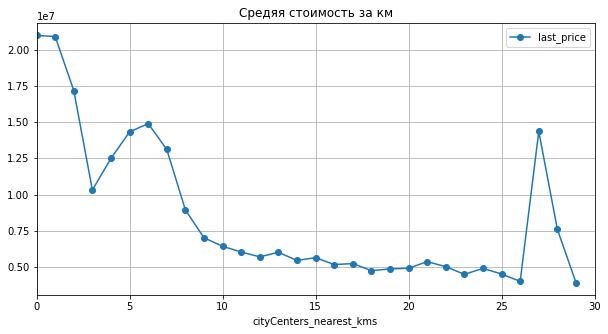

In [102]:
(
    spb_flats
    .pivot_table(index='cityCenters_nearest_kms', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,30), figsize=(10, 5), title='Средяя стоимость за км')
)
plt.show()

В самом центре, от 0 до примерно 3 км от центра, цены достигают пика, а потом резко падают. Затем примерно от 3 км до 7 цены снова вырастают. Вероятно, это связано с неоднородностью "центра". Обозначим центр города в радиусе до 7 км

## 8. Анализ центральной части города<a id="8id"></a>

Сделаем срез квартир, которые находятся в радиусе 7 км от центра и проанализируем по следующим параметрам: площадь, цена, число комнат, высота потолков

In [103]:
spb_flats_center = spb_flats.query('cityCenters_nearest_kms <= 7').reset_index(drop=True)

In [104]:
spb_flats_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().round()

,total_area,last_price,rooms,ceiling_height
count,1632.0,1632.0,1632.0,1632.0
mean,92.0,14262462.0,3.0,3.0
std,59.0,21032765.0,1.0,0.0
min,12.0,1600000.0,0.0,2.0
25%,56.0,6500000.0,2.0,3.0
50%,77.0,8772500.0,3.0,3.0
75%,108.0,13457500.0,3.0,3.0
max,618.0,330000000.0,11.0,5.0


В центральном районе Санкт-Петербурга 3525 квартир, которые ждут своего покупателя. Минимальная стоимость квартиры составляет 1 600 000 рублей. Максимальная - 763 миллионов. Достаточно большой разброс.

Медианная площадь в городе: 54
Медианная площадь в центре: 77
Средняя площадь в городе: 63
Средняя площадь в ценре: 92


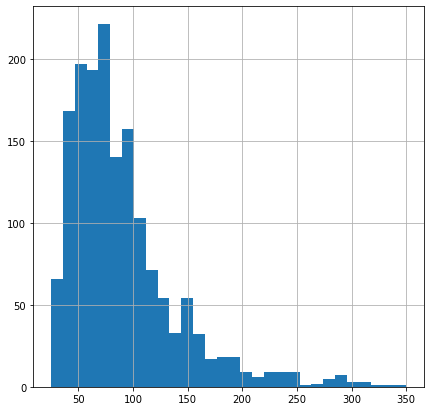

In [105]:
# Изучим площадь

print('Медианная площадь в городе:', round(new_df.query('locality_name == "Санкт-Петербург"')['total_area'].median()))
print('Медианная площадь в центре:', round(spb_flats_center['total_area'].median()))
print('Средняя площадь в городе:', round(new_df.query('locality_name == "Санкт-Петербург"')['total_area'].mean()))
print('Средняя площадь в ценре:', round(spb_flats_center['total_area'].mean()))
spb_flats_center['total_area'].hist(bins=30, range=(25,350), figsize=(7,7))
plt.show()

Средняя цена по городу: 7681884
Средняя цена по центру: 14262462
Медианная цена по городу: 5400000
Медианная цена по центру: 8772500


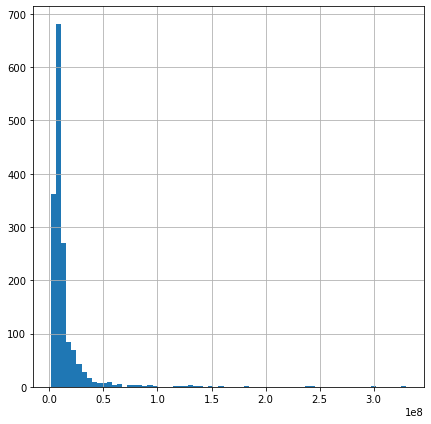

In [106]:
# проверяем цену

spb_flats_center['last_price'].hist(bins=70, figsize=(7,7))
print('Средняя цена по городу:', round(new_df.query('locality_name == "Санкт-Петербург"')['last_price'].mean()))
print('Средняя цена по центру:', round(spb_flats_center['last_price'].mean()))
print('Медианная цена по городу:', round(new_df.query('locality_name == "Санкт-Петербург"')['last_price'].median()))
print('Медианная цена по центру:', round(spb_flats_center['last_price'].median()))
plt.show()

Среднее количество комнат по городу: 2
Среднее количество комнат по ценру: 3


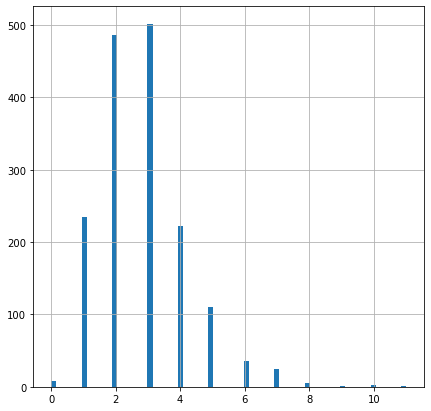

In [107]:
# считаем комнаты

spb_flats_center['rooms'].hist(bins=70, figsize=(7,7))
print('Среднее количество комнат по городу:', round(new_df['rooms'].mean()))
print('Среднее количество комнат по ценру:', round(spb_flats_center['rooms'].mean()))
plt.show()

Медианная высота потолков по городу: 2.7
Медианная высота потолков по центру: 3.0
Средняя высота потолков по городу: 2.751075114304377
Средняя высота потолков по центру: 3.080508578431372


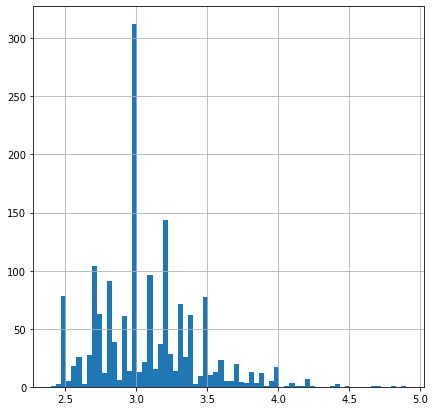

In [108]:
# высота потолков

spb_flats_center['ceiling_height'].hist(bins=70, figsize=(7,7))
print('Медианная высота потолков по городу:', new_df.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median())
print('Медианная высота потолков по центру:', spb_flats_center['ceiling_height'].median())
print('Средняя высота потолков по городу:', new_df.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean())
print('Средняя высота потолков по центру:', spb_flats_center['ceiling_height'].mean())
plt.show()

### Вывод

Средние показатели площади, цены, числа комнат, высоты потолков центральной части города сильно отличаются от остальной.

### 9. Факторы влиящие на стоимость квартир в центре <a id="9id"></a>

Выдели факторы, влияющие на цену (число комнат, этаж, удалённость от центра, дата размещения объявления), а также сравним их с общими выводами по городу.

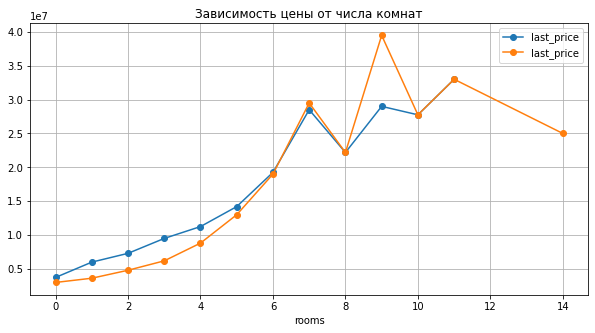

Коэффициент корреляции: 0.6912737736966474


In [109]:
# влияние числа комнат на цену

(spb_flats_center
     .sort_values(by='last_price',ascending=True)
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(10,5),legend=True)
).set_title('Зависимость цены от числа комнат')

(new_df
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(10,5),legend=True)
)
plt.show()

print('Коэффициент корреляции:', spb_flats_center['last_price'].corr(spb_flats_center['total_area']))

Судя по графику, стоимость цены на квартиры растет пропорционально количеству комнат. В центре цены выше, чем в общем по городу. После отметки в 7 комнат графики меняются местами. Возможно, загородом есть дома и коттеджи, где количество комнат превышает средние показатели по городу. Стоимость тоже сильно возрастает.

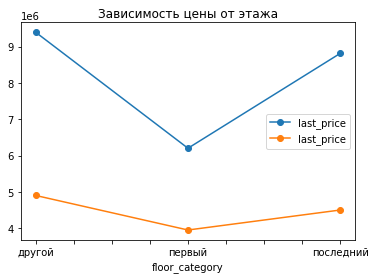

Коэффициент корреляции: 0.034655346838006314


In [110]:
# влияние этажа

(spb_flats_center
    .groupby('floor_category')['last_price'].median()
    .plot(x='floor_category',y='last_price',style='o-',legend=True)
).set_title('Зависимость цены от этажа')


(new_df
    .groupby('floor_category')['last_price'].median()
    .plot(x='floor_category',y='last_price',style='o-',legend=True)
)

plt.show()

print('Коэффициент корреляции:', spb_flats_center['last_price'].corr(spb_flats_center['total_area'].value_counts()))

Этажи на первом этаже покупают меньше, чем на остальных. Оба графика показывают примерно одинаковую картину. Стоимость в центре выше

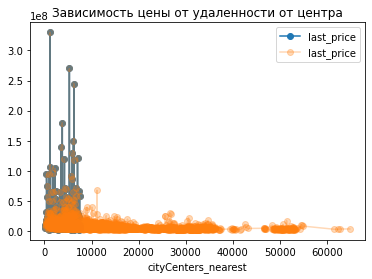

Коэффициент корреляции: -0.04719499724075366


In [111]:
# влияние удаленности от центра

(spb_flats_center
     .groupby('cityCenters_nearest')['last_price'].median()
     .plot(x='cityCenters_nearest',y='last_price',style='o-',  legend=True)
).set_title('Зависимость цены от удаленности от центра')

(new_df
     .groupby('cityCenters_nearest')['last_price'].median()
     .plot(x='cityCenters_nearest',y='last_price',style='o-',alpha=0.3, legend=True)
)

plt.show()

print('Коэффициент корреляции:', spb_flats_center['last_price'].corr(spb_flats_center['cityCenters_nearest']))

Оба графика говорят, что, как правило, чем ближе к центру, тем стоимость квартиры выше. Стоимость квартир в центре напорядок выше

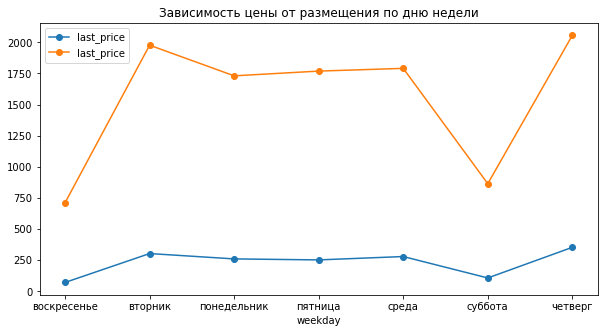

In [112]:
# влияние дня недели 

(spb_flats_center
     .groupby('weekday')['last_price'].count()
     .plot(x='weekday',y='last_price',style='o-', figsize=(10,5), legend=True)
).set_title('Зависимость цены от размещения по дню недели')
 
(new_df
     .groupby('weekday')['last_price'].count()
     .plot(x='weekday',y='last_price',style='o-', legend=True)

 )

plt.show()



Сложно проследить определенную зависимость. График продаж квартир в центре достаточно отнороден. По всему городу - в субботу и воскресенье покупательская активность ниже

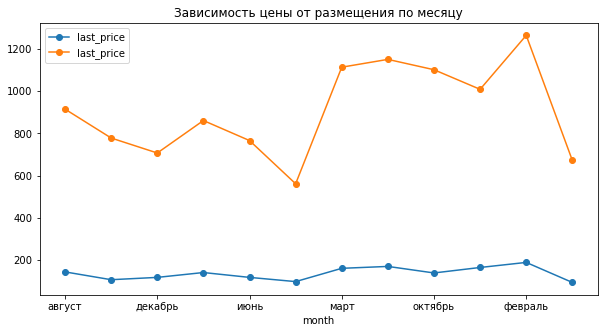

In [113]:
# влияние месяца 

(spb_flats_center
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',style='o-', figsize=(10,5), legend=True)
).set_title('Зависимость цены от размещения по месяцу')
 
(new_df
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',style='o-', legend=True)

 )

plt.show()



По месяцам ситуация примерно похожая. Сегмент квартир в центре не сильно засит от месяца продаж. Ситуация по всему городу отличается: есть пиковые месяцы и месяцы спада покупательской активости

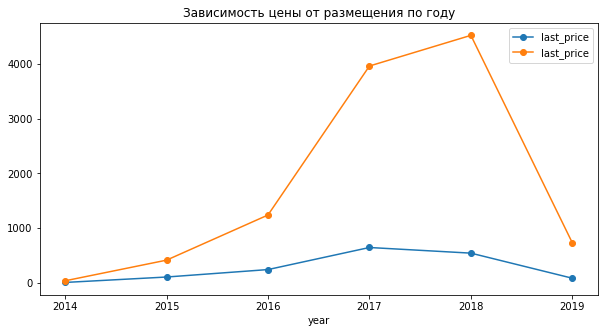

In [114]:
# влияние года

(spb_flats_center
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',style='o-', figsize=(10,5), legend=True)
).set_title('Зависимость цены от размещения по году')
 
(new_df
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',style='o-', legend=True)

 )

plt.show()

Пик продажи квартир приходится на период со второй половины 2017 года по 2018 год.

## Общий вывод<a id="10id"></a>

Мы проанализировали жилищный фонд Санкт-Петербурга (его центральной части и переферии), а также ближайших к нему населенных пунктов. В ходе исследования посчитали цену квадратного метра предлагаемых на портале квартир, смогли определить точную дату публикации, категоризовали некоторые данные, а также смогли определить, какую долю кухни и жилые помещения занимают от общей площади квартир.
Проанализировали, какие характеристики влияют на цену квартиры. Определили среднее время продажи квартиры и пердположили причины сильных отклонений от средних показателей.
Также удалось изучить центральную часть города и сравнить ее показатели с показателями переферии.